In [1]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_pKa = {}
    for index, row in df_main.iterrows():
        SMILES = row['Smiles']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_pKa[SMILES] = row['pKa']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\train_basic.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\test_basic.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    smiles_to_fold = {}
    for index, row in train.iterrows():
        smiles_to_fold[row['Smiles']] = row['fold_id']

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES, smiles_to_fold

train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

In [2]:
# SME - all test(separate model for each molecule)
# relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': -0.053, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.102, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.104, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -0.848, 'O=C(O)C1(C(F)F)CCC1': -0.902, 'O=C(O)C1(C(F)(F)F)CCC1': -1.372, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.281, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.32, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.246, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.328, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.307, 'O=C(O)C1CC1(F)F': -1.148, 'O=C(O)C1CCC1(F)F': -0.962, 'O=C(O)C1CC(F)(F)C1': -0.687, 'O=C(O)C1CCCC1(F)F': -0.865, 'O=C(O)C1CCC(F)(F)C1': -0.092, 'O=C(O)C1CCCCC1(F)F': -0.854, 'O=C(O)C1CCCCCC1(F)F': -0.261, 'O=C(O)C1CCCCC(F)(F)C1': -0.094, 'O=C(O)C1CCCC(F)(F)CC1': -0.031, 'CCC(F)(F)CC(=O)O': -0.957, 'CC(F)(F)CCC(=O)O': -0.111, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.005, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.319, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.321, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.182, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.277, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.291, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.369, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.372, 'O=C(O)[C@@H]1C[C@H]1CF': -0.327, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -0.211, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -3.41, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.22, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.303, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.001, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.007, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.266, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}
# SME - all test(separate model for each molecule) / fixed CF3
# relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': -0.053, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.102, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.104, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -0.848, 'O=C(O)C1(C(F)F)CCC1': -0.902, 'O=C(O)C1(C(F)(F)F)CCC1': -1.372, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.281, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.32, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.246, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.328, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.307, 'O=C(O)C1CC1(F)F': -1.148, 'O=C(O)C1CCC1(F)F': -0.962, 'O=C(O)C1CC(F)(F)C1': -0.687, 'O=C(O)C1CCCC1(F)F': -0.865, 'O=C(O)C1CCC(F)(F)C1': -0.092, 'O=C(O)C1CCCCC1(F)F': -0.854, 'O=C(O)C1CCCCCC1(F)F': -0.261, 'O=C(O)C1CCCCC(F)(F)C1': -0.094, 'O=C(O)C1CCCC(F)(F)CC1': -0.031, 'CCC(F)(F)CC(=O)O': -0.957, 'CC(F)(F)CCC(=O)O': -0.111, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.005, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.319, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.321, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.182, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.277, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.291, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.369, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.372, 'O=C(O)[C@@H]1C[C@H]1CF': -0.327, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -0.211, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -3.618, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.22, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.303, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.001, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.007, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.487, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}
# SME - all test(separate model for each molecule) / fixed CF3 / modified
relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': -0.053, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.102, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.104, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -0.848, 'O=C(O)C1(C(F)F)CCC1': -0.902, 'O=C(O)C1(C(F)(F)F)CCC1': -1.372, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.281, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.32, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.327, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.328, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.207, 'O=C(O)C1CC1(F)F': -1.148, 'O=C(O)C1CCC1(F)F': -0.962, 'O=C(O)C1CC(F)(F)C1': -0.687, 'O=C(O)C1CCCC1(F)F': -0.865, 'O=C(O)C1CCC(F)(F)C1': -0.092, 'O=C(O)C1CCCCC1(F)F': -0.854, 'O=C(O)C1CCCCCC1(F)F': -0.261, 'O=C(O)C1CCCCC(F)(F)C1': -0.094, 'O=C(O)C1CCCC(F)(F)CC1': -0.031, 'CCC(F)(F)CC(=O)O': -0.957, 'CC(F)(F)CCC(=O)O': -0.111, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.005, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.519, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.321, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.182, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.277, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.491, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.369, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.372, 'O=C(O)[C@@H]1C[C@H]1CF': -0.327, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -0.211, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -4.618, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.22, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.303, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.001, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.007, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.487, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}
# LRP - all test(separate model for each molecule) / fixed CF3
# relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': 0.009, 'O=C(O)C1CCCCC1': 0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.012, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.012, 'O=C(O)C1CCC1': 0, 'O=C(O)C1(CF)CCC1': 0.001, 'O=C(O)C1(C(F)F)CCC1': -0.043, 'O=C(O)C1(C(F)(F)F)CCC1': -0.039, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.04, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.04, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.029, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.029, 'O=C(O)[C@H]1C[C@H](CF)C1': 0.013, 'O=C(O)[C@H]1C[C@@H](CF)C1': 0.013, 'O=C(O)C1CC1(F)F': -0.006, 'O=C(O)C1CCC1(F)F': -0.004, 'O=C(O)C1CC(F)(F)C1': 0.017, 'O=C(O)C1CCCC1(F)F': -0.009, 'O=C(O)C1CCC(F)(F)C1': 0.009, 'O=C(O)C1CCCCC1(F)F': -0.002, 'O=C(O)C1CCCCCC1(F)F': 0.003, 'O=C(O)C1CCCCC(F)(F)C1': 0.011, 'O=C(O)C1CCCC(F)(F)CC1': 0.008, 'CCC(F)(F)CC(=O)O': 0.004, 'CC(F)(F)CCC(=O)O': 0.026, 'O=C(O)C1CC1': 0, 'O=C(O)C1CCCC1': 0, 'O=C(O)C1CCCCCC1': 0, 'CCCCC(=O)O': 0, 'O=C(O)C1CC2(CCC2)C1': 0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': 0.024, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.041, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.026, 'O=C(O)[C@@H]1CC[C@H]1CF': 0.023, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.035, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.035, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.03, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.03, 'O=C(O)[C@@H]1C[C@H]1CF': 0.025, 'C[C@@H]1C[C@H]1C(=O)O': 0, 'C[C@@H]1C[C@@H]1C(=O)O': 0, 'O=C(O)C1C(F)(F)C12CC2': -0.007, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.04, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': 0.037, 'NC1CCC(F)(F)CC1': 0.043, 'NC1CCCCC1': -0.032, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': -0.023, 'N[C@H]1C[C@@H]2C[C@@H]2C1': -0.01, 'FC(F)(F)C12CC(CN1)C2': 0.026, 'C1NC2CC1C2': 0.037, 'C1CCNC1': 0.019, 'CC12CC(CN1)C2': 0.025, 'FC(F)(F)C12CCC(CC1)CN2': 0.027, 'C1CC2CC1CN2': 0.02, 'C1CC2CCC1CN2': 0.016, 'C1CCNCC1': 0.01, 'FC(F)(F)C12CCCC(CN1)C2': 0.022, 'C1CC2CNC(C1)C2': 0.019, 'FC1(F)CC2CNCC(C2)C1': 0.035, 'FC1(F)CC2CNCC(C1)C2(F)F': 0.049, 'FC1(F)C2CCCC1CNC2': 0.022, 'C1CC2CNCC(C1)C2': 0.006, 'FC1(F)C2CNCC1COC2': 0.034, 'C1NCC2COCC1C2': -0.026, 'C1CC2CNCC1C2': 0.005, 'C1CNC1': 0.046, 'FC1(F)CNC1': 0.042, 'FC1CCNC1': -0.003, 'FC1(F)CCNC1': 0.038, 'F[C@@H]1CNC[C@@H]1F': 0.056, 'F[C@@H]1CNC[C@H]1F': 0.046, 'FC1CCCNC1': 0.025, 'FC1(F)CCCNC1': 0.026, 'F[C@@H]1CNC[C@H](F)C1': 0.085, 'F[C@@H]1CNC[C@@H](F)C1': 0.072, 'FC1CCNCC1': 0.012, 'F[C@@H]1CCNC[C@@H]1F': 0.057, 'F[C@@H]1CCNC[C@H]1F': 0.06, 'NC1(C(F)(F)F)CCC1': 0.022, 'NC1(C(F)F)CCC1': 0.031, 'NC1(CF)CCC1': 0.061, 'NC1CCC1': -0.069, 'N[C@H]1C[C@H](C(F)(F)F)C1': 0.03, 'N[C@H]1C[C@@H](C(F)(F)F)C1': 0.032, 'N[C@H]1C[C@H](C(F)F)C1': 0.024, 'N[C@H]1C[C@@H](C(F)F)C1': 0.022, 'N[C@H]1C[C@H](CF)C1': 0.025, 'N[C@H]1C[C@@H](CF)C1': 0.021, 'FC(F)C1CCCCN1': 0.016, 'FC(F)C1CCCN1': 0.013, 'FC(F)(F)C1CCN1': 0.025, 'FC(F)C1CCN1': 0.021, 'NCCF': 0.059, 'FC(F)(F)C1CCCNC1': 0.022, 'FC(F)C1CCCNC1': 0.018, 'FCC1CCCNC1': 0.02, 'FC(F)C1CCNC1': 0.015, 'FCC1CCNC1': 0.019, 'FC(F)(F)C1CNC1': 0.03, 'FC(F)C1CNC1': 0.001, 'FCC1CNC1': 0.017, 'NCCC(F)F': 0.032, 'NCCCF': 0.039, 'CCN': 0.019, 'FC(F)C1CCNCC1': 0.016, 'FCC1CCNCC1': 0.025, 'NCCCCF': 0.033, 'NCCCC(F)F': 0.026, 'NCCCC(F)(F)F': 0.03, 'CCCN': 0.032, 'NC1CCC1(F)F': 0.038, 'NC1CC(F)(F)C1': 0.044, 'NC1CCCCC1(F)F': 0.024, 'NC1CCCC(F)(F)C1': 0.039, 'NC1CCCCCC1(F)F': 0.026, 'NC1CCCCC(F)(F)C1': 0.036, 'NC1CCCC(F)(F)CC1': 0.038, 'CCC(F)(F)CN': 0.044, 'CC(F)(F)CCN': 0.037, 'NC1CC1': -0.096, 'NC1CCCC1': -0.072, 'NC1CCCCCC1': -0.049, 'NC1CC2(CCC2)C1': -0.012, 'NC1CC2(C1)CC(F)(F)C2': 0.057, 'N[C@@H]1CC[C@H]1C(F)(F)F': 0.037, 'N[C@@H]1CC[C@H]1CF': 0.03, 'N[C@@H]1C[C@H]1C(F)(F)F': 0.031, 'N[C@H]1C[C@H]1C(F)(F)F': 0.031, 'N[C@@H]1C[C@H]1C(F)F': 0.043, 'N[C@H]1C[C@H]1C(F)F': 0.042, 'C[C@@H]1C[C@H]1N': 0.002, 'NC1CC12CC2': 0.005, 'O=C(O)C1CC12CC2(F)F': 0.017, 'O=C(O)C12CC(CO1)C2': 0, 'O=C(O)C1CCCC(F)(F)C1': 0.008, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0, 'O=C(O)C1CC2(CC(F)C2)C1': 0.035, 'O=C(O)C1CC12CC2': 0, 'O=C(O)CCCC(F)F': -0.032, 'FC(F)(F)C12CCC(CN1)C2': 0.024, 'FC(F)(F)C1CCCN1': 0.022, 'FC(F)(F)C1CCCCN1': 0.024, 'NC1CC12CC2(F)F': 0.041, 'NC1CCCC1(F)F': 0.025, 'FC1(F)CCNCC1': 0.038, 'FC1(F)C2CCC1CNC2': 0.022, 'NC1CCC(F)(F)C1': 0.042, 'FC1CNC1': 0.001, 'N[C@@H]1CC[C@H]1C(F)F': 0.03, 'C[C@@H]1C[C@@H]1N': -0.004, 'FCC1CCCCN1': 0.017, 'FCC1CCCN1': 0.018, 'FCC1CCN1': 0.012, 'NC1CC2(C1)CC(F)C2': 0.042, 'FC(F)(F)C1CCNCC1': 0.012, 'CCCCN': 0.013, 'CC12CCC(CC1)CN2': 0.019, 'CC12CCCC(CN1)C2': 0.025}

relevances_fluorine_all_temp = {}
for smiles, relevance in relevances_fluorine_all.items():
    relevances_fluorine_all_temp[smiles] = round(relevance, 2)
relevances_fluorine_all = relevances_fluorine_all_temp.copy()

In [3]:

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

relevances_fluorine = {}
for SMILES, relevance in relevances_fluorine_all.items():
    if "acid" in SMILES_to_identificator[SMILES].lower():
        relevances_fluorine[SMILES] = relevance

In [4]:
from rdkit import Chem
import re

def convert_google_sheet_url(url):
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    new_url = re.sub(pattern, replacement, url)

    return new_url

import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/edit#gid=0'

new_url = convert_google_sheet_url(url)

print(new_url)

df = pd.read_csv(new_url)

df.dropna(subset=['F Group'], inplace=True)

smiles_to_id = {}
for index, row in df.iterrows():
    smiles_to_id[Chem.CanonSmiles(row['Amine/Acid SMILES'])] = row['Amine/Acid ID']

https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/export?gid=0&format=csv


In [5]:
acid_ids = [
    'cis-γ-3{4,b}',
    'trans-γ-3{4,b}',
    'cis-β-3{3,b}',
    'trans-β-3{3,b}',
]

colors = {
    'cis-β-3{3,b}': "limegreen", #
    'trans-β-3{3,b}': "forestgreen", #
    'cis-γ-3{4,b}': "darkorange",
    'trans-γ-3{4,b}': "burlywood",
}

line_color = {1: "blue", 2: "green", 3: "orange"}

In [6]:
import re

pattern_molecule_type = r"(\d+)\{"
pattern_scaffold_index = r"\{(\d+),\d+\}"

smiles_to_id_cis_trans = {}
for smiles, id in smiles_to_id.items():
    if "cis" in id or "trans" in id:
        molecule_type = int(re.search(pattern_molecule_type, id).group(1))
        scaffold_index = int(re.search(pattern_scaffold_index, id).group(1))
        if molecule_type == 3 and scaffold_index < 8:
            smiles_to_id_cis_trans[smiles] = id
smiles_to_id = smiles_to_id_cis_trans.copy()

In [7]:
import re

amine_type_smiles = {acid_id: [] for acid_id in acid_ids}

pattern_fluorine_group = r"\{\d+,(\d+)\}"
pattern_scaffold_index = r"\{(\d+),\d+\}"
pattern_molecule_type = r"(\d+)\{"

number_of_molecules = 0

for smiles, id in smiles_to_id.items():
    fluorine_group = int(re.search(pattern_fluorine_group, id).group(1))
    scaffold_index = int(re.search(pattern_scaffold_index, id).group(1))
    molecule_type = int(re.search(pattern_molecule_type, id).group(1))

    if fluorine_group not in [3, 4, 5]:
        continue

    if scaffold_index not in [3, 4]:
        continue

    if molecule_type not in [3]:
        continue

    if 'α' not in id and 'β' not in id and 'γ' not in id:
        continue

    transformed_id = id[:-2] + 'b}'

    if transformed_id in amine_type_smiles:
        amine_type_smiles[transformed_id].append(smiles)
    print(smiles, id, transformed_id, fluorine_group, scaffold_index, molecule_type)
    number_of_molecules += 1

print(f"Number of molecule: {number_of_molecules}")

O=C(O)[C@@H]1C[C@@H]1CF cis-β-3{3,3} cis-β-3{3,b} 3 3 3
O=C(O)[C@@H]1C[C@H]1CF trans-β-3{3,3} trans-β-3{3,b} 3 3 3
O=C(O)[C@@H]1CC[C@H]1CF trans-β-3{4,3} trans-β-3{4,b} 3 4 3
O=C(O)[C@H]1C[C@@H](CF)C1 cis-γ-3{4,3} cis-γ-3{4,b} 3 4 3
O=C(O)[C@H]1C[C@H](CF)C1 trans-γ-3{4,3} trans-γ-3{4,b} 3 4 3
O=C(O)[C@H]1C[C@H]1C(F)F cis-β-3{3,4} cis-β-3{3,b} 4 3 3
O=C(O)[C@@H]1C[C@H]1C(F)F trans-β-3{3,4} trans-β-3{3,b} 4 3 3
O=C(O)[C@@H]1CC[C@H]1C(F)F trans-β-3{4,4} trans-β-3{4,b} 4 4 3
O=C(O)[C@H]1C[C@@H](C(F)F)C1 cis-γ-3{4,4} cis-γ-3{4,b} 4 4 3
O=C(O)[C@H]1C[C@H](C(F)F)C1 trans-γ-3{4,4} trans-γ-3{4,b} 4 4 3
O=C(O)[C@H]1C[C@H]1C(F)(F)F cis-β-3{3,5} cis-β-3{3,b} 5 3 3
O=C(O)[C@@H]1C[C@H]1C(F)(F)F trans-β-3{3,5} trans-β-3{3,b} 5 3 3
O=C(O)[C@@H]1CC[C@H]1C(F)(F)F cis-β-3{4,5} cis-β-3{4,b} 5 4 3
O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1 cis-γ-3{4,5} cis-γ-3{4,b} 5 4 3
O=C(O)[C@H]1C[C@H](C(F)(F)F)C1 trans-γ-3{4,5} trans-γ-3{4,b} 5 4 3
Number of molecule: 15


cis-γ-3{4,b} {'CH2F': 4.12, 'CHF2': 3.92, 'CF3': 3.88} {'CH2F': -0.21, 'CHF2': -0.33, 'CF3': -0.32}
trans-γ-3{4,b} {'CH2F': 4.18, 'CHF2': 4.11, 'CF3': 3.83} {'CH2F': -0.33, 'CHF2': -0.33, 'CF3': -0.28}
cis-β-3{3,b} {'CHF2': 4.17, 'CF3': 3.76} {'CHF2': -0.37, 'CF3': -0.49}
trans-β-3{3,b} {'CHF2': 4.18, 'CF3': 3.88} {'CHF2': -0.37, 'CF3': -0.28}


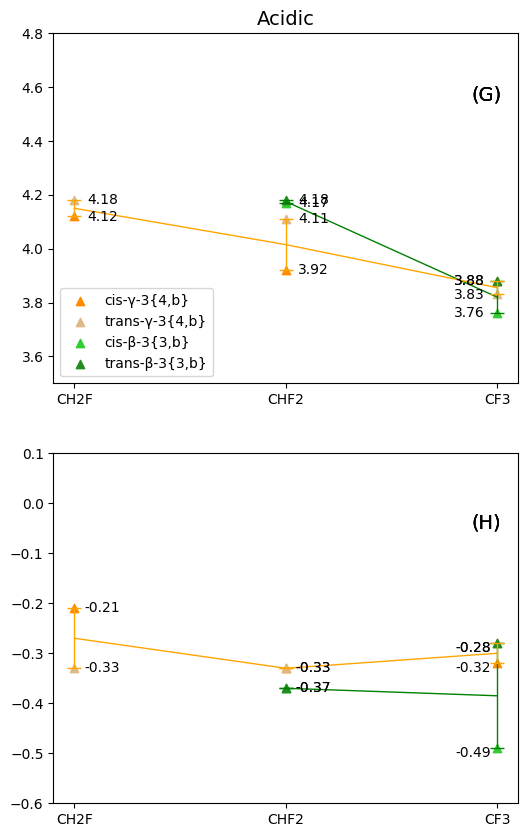

In [8]:
import matplotlib.pyplot as plt
import numpy as np

X_optimal = ['CH2F', 'CHF2', 'CF3']

Y_dict = {distance: {'CH2F': [], 'CHF2': [], 'CF3': []} for distance in range(1, 4)}
Y_pKa_dict = {distance: {'CH2F': [], 'CHF2': [], 'CF3': []} for distance in range(1, 4)}

fig, ((ax2, ax1)) = plt.subplots(2, 1, figsize=(6, 10))
for primary_amines_id, smiles_list in amine_type_smiles.items():
    if primary_amines_id == "trans-β-3{3,b}":
        X_optimal = ['CHF2', 'CF3']
    else:
        X_optimal = ['CH2F', 'CHF2', 'CF3']
    distance_global = None
    if "α" in primary_amines_id:
        distance_global = 1
    elif "β" in primary_amines_id:
        distance_global = 2
    elif "γ" in primary_amines_id:
        distance_global = 3

    f_group_to_pKa = {}
    f_group_to_relevance = {}
    for SMILES in smiles_list:
        if SMILES not in relevances_fluorine:
            continue

        f_group = SMILES_to_fgroup[SMILES]
        if f_group in X_optimal:
            f_group_to_pKa[f_group] = SMILES_to_pKa[SMILES]
            f_group_to_relevance[f_group] = relevances_fluorine[SMILES]
        
    print(primary_amines_id, f_group_to_pKa, f_group_to_relevance)

    X_local = list(f_group_to_pKa.keys())
    y_relevance = list(f_group_to_relevance.values())
    y_pKa = list(f_group_to_pKa.values())

    for f_group_optimal in X_optimal:
        if f_group_optimal not in f_group_to_relevance:
            continue

        Y_dict[distance_global][f_group_optimal].append(f_group_to_relevance[f_group_optimal])
        Y_pKa_dict[distance_global][f_group_optimal].append(f_group_to_pKa[f_group_optimal])

    ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=colors[primary_amines_id], label=primary_amines_id)
    for i in range(len(X_local)):
        x_shift, y_shift = 20, -3
        if i + 1 == len(X_local) and X_local[i] == "CF3":
            x_shift, y_shift = -17, -6

        ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
    # ax1.legend()

    ax2.scatter(X_local, y_pKa, marker='^', linestyle='-', color=colors[primary_amines_id], label=primary_amines_id)
    for i in range(len(X_local)):
        # print(X_local[i], y_pKa[i])
        x_shift, y_shift = 20, -3
        if i + 1 == len(X_local) and X_local[i] == "CF3":
            x_shift, y_shift = -20, -3
        
        ax2.annotate(f"{str(y_pKa[i])}", (X_local[i], y_pKa[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
    ax2.legend()

# errorplot
for distance in range(1, 4):
    X, Y, Y_pKa = [], [], []
    for f_group_name, relevances in Y_dict[distance].items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_pKa.append(Y_pKa_dict[distance][f_group_name])

    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]

    ax1.plot(X, mean_Y, linestyle='-', color=line_color[distance], label="_no_legend", linewidth=1)
    ax1.set_ylim(-0.6, 0.1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color=line_color[distance], capsize=5, elinewidth=1, markeredgewidth=1)

    mean_logP_Y = [np.array(i).mean() for i in Y_pKa]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_pKa]

    ax2.plot(X, mean_logP_Y, linestyle='-', color=line_color[distance], label="_no_legend", linewidth=1)
    ax2.set_ylim(3.5, 4.8)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color=line_color[distance], capsize=5, elinewidth=1, markeredgewidth=1)

    ax2.text(1.88, 4.55, '(G)', fontsize = 14)
    ax1.text(1.88, -0.05, '(H)', fontsize = 14)

    ax2.set_title("Acidic", fontsize=14)
    ax2.legend(loc='lower left')

